In [1]:
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import pytesseract
import cv2

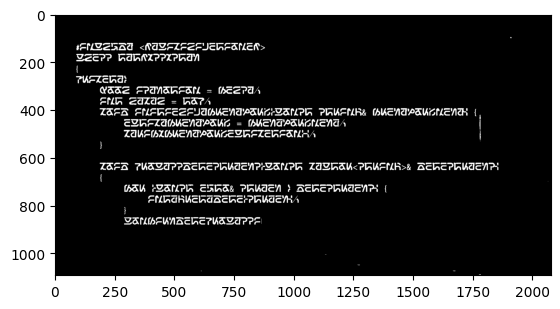

In [66]:
test_image = "images/test_screenshot_1.png"

# Thresholding with opencv
img = cv2.imread(test_image)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 3)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
cv2.imwrite("images/thresh.png", thresh)

# Erosion and dilation
thresh = cv2.dilate(thresh, kernel, iterations=1)
thresh = cv2.erode(thresh, kernel, iterations=1)

plt.imshow(thresh, cmap='gray')

In [68]:
# convert to PIL image
pil_thresh = Image.fromarray(thresh)

tessdata_config = '--tessdata-dir /Users/austringer/Workspace/my-repo/solaris3-ocr/tesstrain/data --psm 6 --oem 3'

ocr_data = pytesseract.image_to_data(pil_thresh, lang='Solaris-3', config=tessdata_config, output_type=pytesseract.Output.DICT)
print(ocr_data['text'])

['', '', '', '', '(include', '<hecivilizationah>', '', 'class', 'tethyssystem', '', '!', '', 'private:', '', 'bool', 'isemotion', '=', 'false;', '', 'int', 'level', '=', 'top;', '', 'void', 'initializeframework(const', 'string.y', 'frameworkname)', '|', '', 'activeframework', '=', 'frameworkname;', '', 'verifyframeworkactivation();', '', 'void', 'processdatastreams(const', 'vector<string>%', 'datastreams)', '', '!', '', 'for', '(const', 'autoy', 'stream', ':', 'datastreams)', '(', '', 'integratedata(stream);', '', '!', '', 'confirmdataprocessi!']


In [69]:
min_conf = 0

# loop over each of the individual text localizations
for i in range(0, len(ocr_data["text"])):
	# extract the bounding box coordinates of the text region from
	# the current result
	x = ocr_data["left"][i]
	y = ocr_data["top"][i]
	w = ocr_data["width"][i]
	h = ocr_data["height"][i]
	# extract the OCR text itself along with the confidence of the
	# text localization
	text = ocr_data["text"][i]
	conf = int(ocr_data["conf"][i])
 
    # filter out weak confidence text localizations
	if conf > min_conf:
		# display the confidence and text to our terminal
		print("Confidence: {}".format(conf))
		print("Text: {}".format(text))
		print("")
		# strip out non-ASCII text so we can draw the text on the image
		# using OpenCV, then draw a bounding box around the text along
		# with the text itself
		text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
		cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
		cv2.putText(img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
			1.2, (0, 0, 255), 3)
# show the output image
cv2.imwrite("images/output_test.png", img)

Confidence: 92
Text: (include

Confidence: 91
Text: <hecivilizationah>

Confidence: 93
Text: class

Confidence: 92
Text: tethyssystem

Confidence: 91
Text: !

Confidence: 92
Text: private:

Confidence: 93
Text: bool

Confidence: 92
Text: isemotion

Confidence: 88
Text: =

Confidence: 67
Text: false;

Confidence: 93
Text: int

Confidence: 93
Text: level

Confidence: 89
Text: =

Confidence: 93
Text: top;

Confidence: 92
Text: void

Confidence: 92
Text: initializeframework(const

Confidence: 76
Text: frameworkname)

Confidence: 45
Text: |

Confidence: 93
Text: activeframework

Confidence: 89
Text: =

Confidence: 91
Text: frameworkname;

Confidence: 84
Text: verifyframeworkactivation();

Confidence: 92
Text: void

Confidence: 92
Text: processdatastreams(const

Confidence: 75
Text: vector<string>%

Confidence: 79
Text: datastreams)

Confidence: 92
Text: !

Confidence: 93
Text: for

Confidence: 91
Text: (const

Confidence: 38
Text: autoy

Confidence: 91
Text: stream

Confidence: 93
Text: :



True

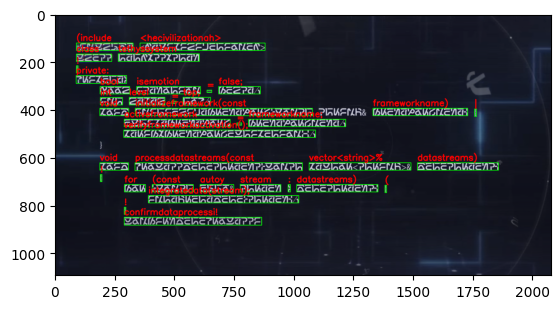

In [70]:
plt.imshow(np.flip(img, axis=-1))
plt.show()